## UNIVERSIDAD DE BUENOS AIRES - FACULTAD DE INGENIERÍA

**75.06/95.58 Organización de Datos
Segundo Cuatrimestre de 2018
Trabajo Práctico 1: Web analytics de www.trocafone.com**

Grupo 42:
Miranda, Pablo
Marinier, Sebastián
Farfán, Verónica
Basconcelo, Eliana

### *Carga de Librerias, set de datos y establecimiento de gráficos*

In [1]:
# Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [2]:
# Change working directory
os.chdir('C:/Users/vfarfan/OD')
# Load the data
df = pd.read_csv("data/events_up_to_01062018.csv", dtype={'sku' : 'object'}) # sku como object para poder eliminar el .0 en los str

C:\Users\vfarfan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(df.columns.values)

['timestamp' 'event' 'person' 'url' 'sku' 'model' 'condition' 'storage'
 'color' 'skus' 'search_term' 'staticpage' 'campaign_source'
 'search_engine' 'channel' 'new_vs_returning' 'city' 'region' 'country'
 'device_type' 'screen_resolution' 'operating_system_version'
 'browser_version']


In [4]:
df.describe()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
count,2341681,2341681,2341681,191131,1320530,1321513,1320530,1320530,1320530,505949,...,106406,204069,204069,204069,204069,204069,204069,204066,204069,204069
unique,1490912,11,38829,248,3693,208,5,8,63,52267,...,4,7,2,2206,122,51,4,393,131,366
top,2018-05-31 01:59:16,viewed product,c76b8417,/,2830.0,iPhone 6,Bom,16GB,Preto,"2820,6706,6720,2750,6649,7251,6663,12604,7224,...",...,Google,Paid,Returning,Unknown,Sao Paulo,Brazil,Smartphone,360x640,Windows 7,Chrome 66.0
freq,14,1248124,4438,64187,8462,107262,547617,442096,314925,2606,...,105195,91753,165827,36866,57304,197699,103502,73234,46648,57953


### Eventos posibles para los usuarios

In [5]:
print(df['event'].value_counts())

viewed product       1248124
brand listing         216312
visited site          204069
ad campaign hit       191388
generic listing       160176
searched products     130616
search engine hit     106406
checkout               65315
staticpage             11201
conversion              7091
lead                     983
Name: event, dtype: int64


## 2. Preprocesamiento y descripción de Datos

### Preprocesamiento de Datos

#### Procesar el campo SKU para eliminar el .0
Algunos SKUs están cargados con un .0 como si fueran decimales.  Los levantamos como string y eliminamos el .0 para normalizar el dato.

In [6]:
print(df.loc[df['sku'].isnull(),'event'].unique())
print(df.loc[df['sku'].notnull(),'event'].unique())

['searched products' 'ad campaign hit' 'staticpage' 'search engine hit'
 'generic listing' 'brand listing' 'visited site' 'lead']
['viewed product' 'checkout' 'conversion']


In [7]:
df.loc[df['sku'].apply(type) == str,'sku'] = df.loc[df['sku'].apply(type) == str,'sku'].str.replace('\.0', '')

#### Procesar el campo SKU para eliminar valores undefined

In [8]:
print(df.loc[df['sku'] == 'undefined',:]['person'])
df.loc[df['person'] == '602b3649','sku'].apply(type)
df.loc[df['person'] == '655402b0',:]

Series([], Name: person, dtype: object)


,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version


Existen dos eventos checkout con sku="undefined". Son nuevos usuarios, visitaron el sitio e hicieron checkout sin elegir producto. Elegimos eliminar la sesión del usuario que contenga estos registros 'undefined'.

In [9]:
# Elimino SKUs "undefined"
df = df.loc[df['sku'] != 'undefined',:]

#### Convertir datos categóricos

In [10]:
# Convert data types
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['event'] = pd.Categorical(df['event'])
#df['person']
df['url'] = pd.Categorical(df['url'])
df['sku'] = pd.Categorical(df['sku'])
df['model'] = pd.Categorical(df['model'])
df['condition'] = pd.Categorical(df['condition'])
df['storage'] = pd.Categorical(df['storage'])
df['color'] = pd.Categorical(df['color'])
#df['skus'] = pd.Categorical(df['skus'])
#df['search_term']
df['staticpage'] = pd.Categorical(df['staticpage'])
df['campaign_source'] = pd.Categorical(df['campaign_source'])
df['search_engine'] = pd.Categorical(df['search_engine'])
df['channel'] = pd.Categorical(df['channel'])
df['new_vs_returning'] = pd.Categorical(df['new_vs_returning'])
df['city'] = pd.Categorical(df['city'])
df['region'] = pd.Categorical(df['region'])
df['country'] = pd.Categorical(df['country'])
df['device_type'] = pd.Categorical(df['device_type'])
df['screen_resolution'] = pd.Categorical(df['screen_resolution'])
df['operating_system_version'] = pd.Categorical(df['operating_system_version'])
df['browser_version'] = pd.Categorical(df['browser_version'])


#### Agregar columnas para día y mes

In [11]:
df['day'] = df['timestamp'].dt.to_period('D').dt.to_timestamp()
df['month'] = df['timestamp'].dt.to_period('M').dt.to_timestamp()

#### Agregar columna con la Marca extraída del campo model
La primer palabra en este campo corresponde a la marca del producto.

In [12]:
df['brand'] = pd.Categorical(df['model'].str.split(' ').str.get(0))

#### Eliminar registros que no correspondan a Brasil
Nos quedamos sólo con datos de Brasil únicamente por ser representativos del total de datos.  De esta forma, todos los usuarios que analizamos tendrán un visited site y además excluimos los usuarios que sólo tienen un evento checkout.

## Existen en los archivos de test y train usuarios que no son de Brasil, por lo que no deberíamos eliminarlos¿?

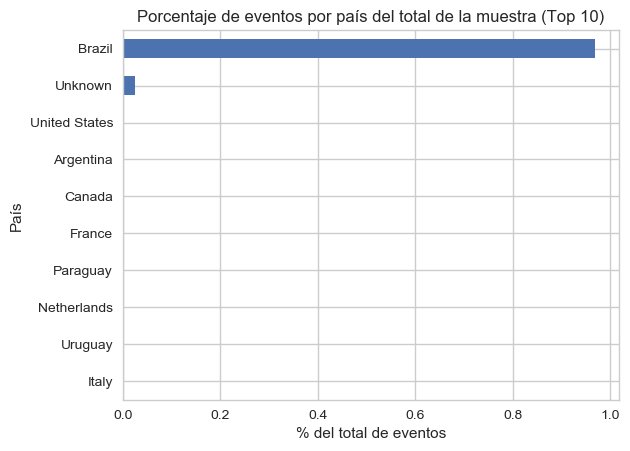

In [13]:
df['country'].value_counts(normalize=True, ascending=True)[-10:].plot.barh()
plt.ylabel('País')
plt.xlabel('% del total de eventos')
plt.title('Porcentaje de eventos por país del total de la muestra (Top 10)')
plt.show()

In [14]:
# Filtramos para quedarnos sólo con los usuarios de Brasil
#df = pd.DataFrame({'person':df.loc[df['country']=='Brazil',('person')].unique()}).merge(df, how='inner')

In [15]:
#print(df.loc[df['event']=='ad campaign hit',:]['url'].value_counts())
#print(pd.Categorical(df['url'].str.split('/').str.get(1)).value_counts())
df['url_brand'] = pd.Categorical(df['url'].str.split('/').str.get(2))
df['os'] = pd.Categorical(df['operating_system_version'].str.split(' ').str.get(0))
df['browser'] = pd.Categorical(df['browser_version'].str.split(' ').str.get(0))

#### Descripción del nuevo dataset

In [16]:
df.describe()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,device_type,screen_resolution,operating_system_version,browser_version,day,month,brand,url_brand,os,browser
count,2341681,2341681,2341681,191131,1320530,1321513,1320530,1320530,1320530,505949,...,204069,204066,204069,204069,2341681,2341681,1321513,126934,204069,204069
unique,1490912,11,38829,248,2328,208,5,8,63,52267,...,4,393,131,366,151,5,11,14,13,22
top,2018-05-31 01:59:16,viewed product,c76b8417,/,2830,iPhone 6,Bom,16GB,Preto,"2820,6706,6720,2750,6649,7251,6663,12604,7224,...",...,Smartphone,360x640,Windows 7,Chrome 66.0,2018-05-29 00:00:00,2018-05-01 00:00:00,iPhone,samsung,Android,Chrome
freq,14,1248124,4438,64187,8601,107262,547617,442096,314925,2606,...,103502,73234,46648,57953,109435,1713920,593603,63029,96901,173833
first,2018-01-01 08:09:31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2018-01-01 00:00:00,2018-01-01 00:00:00,NaN,NaN,NaN,NaN
last,2018-05-31 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2018-05-31 00:00:00,2018-05-01 00:00:00,NaN,NaN,NaN,NaN


#### Período de tiempo en el cual se realiza el análisis

In [17]:
print(min(df['timestamp']))
print(max(df['timestamp']))

2018-01-01 08:09:31
2018-05-31 23:59:59


## 3. Análisis de Datos

### 3.1 Clientes

In [18]:
print("Clientes")
print(df['person'].nunique())

Clientes
38829


#### Distinción de sesiones por usuario
Cada sesión agrupa los eventos separados entre sí no más de 30 minutos.

In [19]:
# Definimos un límite de tiempo entre eventos
T = timedelta(seconds=30*60)
# Ordenamos el dataset por timestamp
df = df.sort_values(by=['timestamp'])
# Agregamos una columna con el timestamp anterior
df['last_timestamp'] = df.groupby(['person'])['timestamp'].shift()
# Crear flag de nueva sesión
df['new_session'] = (((df['timestamp']
                            - df['last_timestamp'])>=T) | (df['last_timestamp'].isnull())).astype(int)
df['inc'] = df.groupby('person')['new_session'].cumsum()
# Creamos el id de sesión
df['session_id'] = df['person'].astype(str) + '_' + df['inc'].astype(str)
df = df.drop('inc', axis=1)

Agrupamos la cantidad de eventos de cada tipo por sesión

In [20]:
dfsesion = df.loc[:,('session_id','event','timestamp')].pivot_table(index='session_id', columns='event', values='timestamp', aggfunc='count')
dfsesion.columns = dfsesion.columns.astype('object')
dfsesion = dfsesion.reset_index()
dfsesion.head()

event,session_id,ad campaign hit,brand listing,checkout,conversion,generic listing,lead,search engine hit,searched products,staticpage,viewed product,visited site
0,0008ed71_1,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0008ed71_2,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,0008ed71_3,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0
3,00091926_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,1.0
4,00091926_10,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0


Agregamos al dataframe las características de cada sesión
- eventos por sesión
- comienzo y fin de la sesión
- tiempo total
- tiempo en la última transacción?

In [21]:
# Creamos un dataframe por sesión con las características de cada una
dfsesionfeat = df.groupby(['session_id','person']).agg({'event':'count', 'timestamp':['min','max']})
dfsesionfeat.columns = dfsesionfeat.columns.droplevel()
dfsesionfeat.columns = ['event count','min timestamp','max timestamp']
# Agregamos la duración en segundos de cada sesión
dfsesionfeat['time lapsed'] = ((dfsesionfeat['max timestamp']) - dfsesionfeat['min timestamp']).astype('timedelta64[s]')
# Eliminamos índices para hacer el merge
dfsesionfeat = dfsesionfeat.reset_index()
# Hacemos un join para agregar la cantidad de cada tipo de evento por sesión
dfsesionfeat = dfsesionfeat.merge(dfsesion)
dfsesionfeat.head()

,session_id,person,event count,min timestamp,max timestamp,time lapsed,ad campaign hit,brand listing,checkout,conversion,generic listing,lead,search engine hit,searched products,staticpage,viewed product,visited site
0,0008ed71_1,0008ed71,1,2018-05-17 12:27:47,2018-05-17 12:27:47,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0008ed71_2,0008ed71,2,2018-05-17 13:44:59,2018-05-17 13:45:00,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,0008ed71_3,0008ed71,3,2018-05-17 16:21:54,2018-05-17 16:28:37,403.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0
3,00091926_1,00091926,7,2018-05-03 22:08:29,2018-05-03 22:09:59,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,1.0
4,00091926_10,00091926,4,2018-05-11 02:23:38,2018-05-11 02:23:57,19.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0


Ver: no se está incluyendo el tiempo del último evento, habría que ver si lo calculamos como promedio de tiempos de los eventos o de otra forma.

# Sets de datos

Creamos un set de datos por usuario al que iremos agregando distintas características. 


### Features:
- cantidad total de sesiones
- promedio de eventos por sesión
- tiempo total en el sitio
- tiempo promedio por sesión
- cantidad total de cada evento:
    - ad campaign hit
    - brand listing
    - checkout
    - conversion
    - generic listing
    - lead
    - search engine hit
    - searched products
    - staticpage
    - viewed product
    - visited site

In [22]:
user_session = dfsesionfeat.groupby(['person']).agg({'session_id':'count','event count':'mean',
                                      'time lapsed':['sum','mean'],'ad campaign hit':'sum','brand listing':'sum',
                                      'checkout':'sum','conversion':'sum','generic listing':'sum',
                                      'lead':'sum','search engine hit':'sum','searched products':'sum',
                                      'staticpage':'sum','viewed product':'sum','visited site':'sum'
                                     })
print('Cantidad de personas:',user_session.shape[0])
user_session.head()

Cantidad de personas: 38829


session_id event count time lapsed              ad campaign hit  \
              count        mean         sum         mean             sum   
person                                                                     
0008ed71          3    2.000000       404.0   134.666667             NaN   
00091926         34   13.176471     14890.0   437.941176            15.0   
00091a7a          1   10.000000       347.0   347.000000             1.0   
000ba417          5   41.200000     12703.0  2540.600000             1.0   
000c79fe          1   17.000000       620.0   620.000000             1.0   

         brand listing checkout conversion generic listing lead  \
                   sum      sum        sum             sum  sum   
person                                                            
0008ed71           NaN      3.0        NaN             1.0  NaN   
00091926          25.0      2.0        NaN             NaN  NaN   
00091a7a           5.0      NaN        NaN             NaN  NaN   
000ba417          24.0      6.0        1.0            14.0  NaN   
000c79fe           NaN      1.0        NaN             1.0  NaN   

         search engine hit searched products staticpage viewed product  \
                       sum               sum        sum            sum   
person                                                                   
0008ed71               NaN               NaN        NaN            NaN   
00091926               NaN               NaN        NaN          372.0   
00091a7a               NaN               NaN        NaN            3.0   
000ba417               1.0               NaN        NaN          153.0   
000c79fe               1.0               9.0        NaN            3.0   

         visited site  
                  sum  
person                 
0008ed71          2.0  
00091926         34.0  
00091a7a          1.0  
000ba417          6.0  
000c79fe          1.0

### Otras features para agregar según el contenido (por ahora no lo estamos usando para el modelo)
Voy armando la matriz de contenido para cada sesión:
Además se puede bajar un nivel más y tener en cuenta el contenido de cada evento.  Para cada cliente se puede analizar si tuvo o no un evento de cierto tipo (matriz de 0 y 1) o qué cantidad de eventos de cada tipo tuvo (matriz con valores de 0 a n)
- ad campaign hit
    - campaign source: ocurrencias para cada origen de campaña
    - url_brand: de la url se puede extraer la marca, modelo y acción (compra/venta)
- search engine hit:
    - search engine
- static page:
    - staticpage: <---- cómo se puede analizar?
- visited site:
    - channel
    - device: obtengo el tipo de dispositivo extrayendo la primer palabra.  Sale la marca.
    - new_vs_returning
    - browser: extraigo el browser sin la versión
    - OS: extraigo el SO, sin la versión
    - city, region, coutry: <------------- cómo se puede incluir?
    - screen_resolution: <------------- cómo se puede incluir?
- searched products
    - skus: contar cuántos sku distintos buscaron?
    - searched term: limitar pabras buscadas? por marca?
- viewed product
    - sku - cómo limitar?
    - model - usamos brand
    - condition
    - storage
    - color
- Checked out
    - igual a viewed
- conversion
    - igual a viewed
- lead:
    - para cada sku??

In [41]:
# primero obtengo para cada persona sus sesiones.
data = df.loc[:,('person','session_id')].drop_duplicates()

#### Ad campaign hit

In [42]:
dfcontent = df.loc[df['event']=='ad campaign hit',('session_id','campaign_source','timestamp')].pivot_table(index='session_id', columns='campaign_source', values='timestamp', aggfunc='count')
dfcontent.columns = dfcontent.columns.astype('object')
dfcontent = dfcontent.reset_index()
# voy haciendo el join con la tabla final
data = data.merge(dfcontent, on='session_id', how='left')

dfcontent = df.loc[df['event']=='ad campaign hit',('session_id','url_brand','timestamp')].pivot_table(index='session_id', columns='url_brand', values='timestamp', aggfunc='count')
dfcontent.columns = dfcontent.columns.astype('object')
dfcontent = dfcontent.reset_index()
data = data.merge(dfcontent, on='session_id', how='left')
data.head()

,person,session_id,Facebook,FacebookAds,FacebookSocial,MARKETING SOCIAL,afiliado,afilio,bing,blog,...,iphone,lenovo,lg,list,motorola,nokia,ofertas,quantum,samsung,sony
0,0f4e2a4b,0f4e2a4b_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0f4e2a4b,0f4e2a4b_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7c7e0de9,7c7e0de9_1,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8af11dbc,8af11dbc_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,23252ece,23252ece_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Search engine hit

In [43]:
dfcontent = df.loc[df['event']=='search engine hit',('session_id','search_engine','timestamp')].pivot_table(index='session_id', columns='search_engine', values='timestamp', aggfunc='count')
dfcontent.columns = dfcontent.columns.astype('object')
dfcontent = dfcontent.reset_index()

data = data.merge(dfcontent, on='session_id', how='left')
data.head()

,person,session_id,Facebook,FacebookAds,FacebookSocial,MARKETING SOCIAL,afiliado,afilio,bing,blog,...,motorola,nokia,ofertas,quantum,samsung,sony,Ask,Bing,Google,Yahoo
0,0f4e2a4b,0f4e2a4b_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1,0f4e2a4b,0f4e2a4b_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,7c7e0de9,7c7e0de9_1,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8af11dbc,8af11dbc_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN
4,23252ece,23252ece_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Static page

In [182]:
dfcontent = df.loc[df['event']=='staticpage',('session_id','staticpage','timestamp')].pivot_table(index='session_id', columns='staticpage', values='timestamp', aggfunc='count')
dfcontent.columns = dfcontent.columns.astype('object')
dfcontent = dfcontent.reset_index()
dfcontent.head()
# voy haciendo el join con la tabla final
data = data.merge(dfcontent, on='session_id', how='left')
data.shape

(205640, 57)

#### Visited site
- channel
- device type
- new vs returning
- operating_system_version: la primer palabra es el OS
- browser_version

In [183]:
dfcontent = df.loc[df['event']=='visited site',('session_id','channel','timestamp')].pivot_table(index='session_id', columns='channel', values='timestamp', aggfunc='count')
dfcontent.columns = dfcontent.columns.astype('object')
dfcontent = dfcontent.reset_index()
dfcontent.head()
# voy haciendo el join con la tabla final
data = data.merge(dfcontent, on='session_id', how='left')
print(data.shape)
dfcontent = df.loc[df['event']=='visited site',('session_id','device_type','timestamp')].pivot_table(index='session_id', columns='device_type', values='timestamp', aggfunc='count')
dfcontent.columns = dfcontent.columns.astype('object')
dfcontent = dfcontent.reset_index()
dfcontent.head()
# voy haciendo el join con la tabla final
data = data.merge(dfcontent, on='session_id', how='left')
data.shape
dfcontent = df.loc[df['event']=='visited site',('session_id','new_vs_returning','timestamp')].pivot_table(index='session_id', columns='new_vs_returning', values='timestamp', aggfunc='count')
dfcontent.columns = dfcontent.columns.astype('object')
dfcontent = dfcontent.reset_index()
dfcontent.head()
# voy haciendo el join con la tabla final
data = data.merge(dfcontent, on='session_id', how='left')
data.shape
dfcontent = df.loc[df['event']=='visited site',('session_id','os','timestamp')].pivot_table(index='session_id', columns='os', values='timestamp', aggfunc='count')
dfcontent.columns = dfcontent.columns.astype('object')
dfcontent = dfcontent.reset_index()
dfcontent.head()
# voy haciendo el join con la tabla final
data = data.merge(dfcontent, on='session_id', how='left')
data.shape
dfcontent = df.loc[df['event']=='visited site',('session_id','browser','timestamp')].pivot_table(index='session_id', columns='browser', values='timestamp', aggfunc='count')
dfcontent.columns = dfcontent.columns.astype('object')
dfcontent = dfcontent.reset_index()
dfcontent.head()
# voy haciendo el join con la tabla final
data = data.merge(dfcontent, on='session_id', how='left')
data.shape

(205640, 64)


(205640, 105)

#### Viewed product

In [184]:
dfcontent = df.loc[df['event']=='viewed product',('session_id','brand','timestamp')].pivot_table(index='session_id', columns='brand', values='timestamp', aggfunc='count')

dfcontent.columns = dfcontent.columns.astype('object')
dfcontent = dfcontent.reset_index()
dfcontent.head()
# voy haciendo el join con la tabla final
data = data.merge(dfcontent, on='session_id', how='left')
print(data.shape)
dfcontent = df.loc[df['event']=='viewed product',('session_id','condition','timestamp')].pivot_table(index='session_id', columns='condition', values='timestamp', aggfunc='count')
dfcontent.columns = dfcontent.columns.astype('object')
dfcontent = dfcontent.reset_index()
dfcontent.head()
# voy haciendo el join con la tabla final
data = data.merge(dfcontent, on='session_id', how='left')
print(data.shape)
dfcontent = df.loc[df['event']=='viewed product',('session_id','storage','timestamp')].pivot_table(index='session_id', columns='storage', values='timestamp', aggfunc='count')
dfcontent.columns = dfcontent.columns.astype('object')
dfcontent = dfcontent.reset_index()
dfcontent.head()
# voy haciendo el join con la tabla final
data = data.merge(dfcontent, on='session_id', how='left')
print(data.shape)
dfcontent = df.loc[df['event']=='viewed product',('session_id','color','timestamp')].pivot_table(index='session_id', columns='color', values='timestamp', aggfunc='count')
dfcontent.columns = dfcontent.columns.astype('object')
dfcontent = dfcontent.reset_index()
dfcontent.head()
# voy haciendo el join con la tabla final
data = data.merge(dfcontent, on='session_id', how='left')
data.shape

(205640, 114)
(205640, 119)
(205640, 127)


(205640, 190)

#### Checkout

In [185]:
dfcontent = df.loc[df['event']=='checkout',('session_id','brand','timestamp')].pivot_table(index='session_id', columns='brand', values='timestamp', aggfunc='count')
dfcontent.columns = dfcontent.columns.astype('object')
dfcontent = dfcontent.reset_index()
dfcontent.head()
# voy haciendo el join con la tabla final
data = data.merge(dfcontent, on='session_id', how='left', suffixes=('_viewed', '_checkout'))
print(data.shape)
dfcontent = df.loc[df['event']=='checkout',('session_id','condition','timestamp')].pivot_table(index='session_id', columns='condition', values='timestamp', aggfunc='count')
dfcontent.columns = dfcontent.columns.astype('object')
dfcontent = dfcontent.reset_index()
dfcontent.head()
# voy haciendo el join con la tabla final
data = data.merge(dfcontent, on='session_id', how='left', suffixes=('_viewed', '_checkout'))
print(data.shape)
dfcontent = df.loc[df['event']=='checkout',('session_id','storage','timestamp')].pivot_table(index='session_id', columns='storage', values='timestamp', aggfunc='count')
dfcontent.columns = dfcontent.columns.astype('object')
dfcontent = dfcontent.reset_index()
dfcontent.head()
# voy haciendo el join con la tabla final
data = data.merge(dfcontent, on='session_id', how='left', suffixes=('_viewed', '_checkout'))
print(data.shape)
dfcontent = df.loc[df['event']=='checkout',('session_id','color','timestamp')].pivot_table(index='session_id', columns='color', values='timestamp', aggfunc='count')
dfcontent.columns = dfcontent.columns.astype('object')
dfcontent = dfcontent.reset_index()
dfcontent.head()
# voy haciendo el join con la tabla final
data = data.merge(dfcontent, on='session_id', how='left', suffixes=('_viewed', '_checkout'))
print(data.shape)

(205640, 199)
(205640, 204)
(205640, 212)
(205640, 263)


#### Conversion

In [186]:
dfcontent = df.loc[df['event']=='conversion',('session_id','brand','timestamp')].pivot_table(index='session_id', columns='brand', values='timestamp', aggfunc='count')
dfcontent.columns = dfcontent.columns.astype('object')
dfcontent = dfcontent.reset_index()
dfcontent.head()
# voy haciendo el join con la tabla final
data = data.merge(dfcontent, on='session_id', how='left', suffixes=('', '_conversion'))
print(data.shape)
dfcontent = df.loc[df['event']=='conversion',('session_id','condition','timestamp')].pivot_table(index='session_id', columns='condition', values='timestamp', aggfunc='count')
dfcontent.columns = dfcontent.columns.astype('object')
dfcontent = dfcontent.reset_index()
dfcontent.head()
# voy haciendo el join con la tabla final
data = data.merge(dfcontent, on='session_id', how='left', suffixes=('', '_conversion'))
print(data.shape)
dfcontent = df.loc[df['event']=='conversion',('session_id','storage','timestamp')].pivot_table(index='session_id', columns='storage', values='timestamp', aggfunc='count')
dfcontent.columns = dfcontent.columns.astype('object')
dfcontent = dfcontent.reset_index()
dfcontent.head()
# voy haciendo el join con la tabla final
data = data.merge(dfcontent, on='session_id', how='left', suffixes=('', '_conversion'))
print(data.shape)
dfcontent = df.loc[df['event']=='conversion',('session_id','color','timestamp')].pivot_table(index='session_id', columns='color', values='timestamp', aggfunc='count')
dfcontent.columns = dfcontent.columns.astype('object')
dfcontent = dfcontent.reset_index()
dfcontent.head()
# voy haciendo el join con la tabla final
data = data.merge(dfcontent, on='session_id', how='left', suffixes=('', '_conversion'))
print(data.shape)

(205640, 272)
(205640, 277)
(205640, 285)
(205640, 323)


# Dataset final
Agrupo por person y agrego los datos por sesión

In [24]:
# print(data.size)
# print(data.shape)
# data = data.groupby('person').sum()
# data = data.reset_index()
# print(data.shape)

In [25]:
# data1 = user_session
# data1.columns = data1.columns.astype('object')
# data1 = data1.reset_index()
# data1.head()

In [26]:
# data1 = data1.merge(data, on=['person'], how='left', suffixes=('', '_content'))
# data1.shape

Agrupar por personas

In [27]:
# byperson = data1.groupby('person').sum()
# byperson.shape
#byperson.head()

## Features para agregar o cambiar?
- tiempo entre sesiones

## Preprocesamiento de los datos

- Reemplazamos los Nan con 0

In [28]:
byperson = user_session.fillna(0)
byperson.size

582435

In [29]:
byperson.head()

session_id event count time lapsed              ad campaign hit  \
              count        mean         sum         mean             sum   
person                                                                     
0008ed71          3    2.000000       404.0   134.666667             0.0   
00091926         34   13.176471     14890.0   437.941176            15.0   
00091a7a          1   10.000000       347.0   347.000000             1.0   
000ba417          5   41.200000     12703.0  2540.600000             1.0   
000c79fe          1   17.000000       620.0   620.000000             1.0   

         brand listing checkout conversion generic listing lead  \
                   sum      sum        sum             sum  sum   
person                                                            
0008ed71           0.0      3.0        0.0             1.0  0.0   
00091926          25.0      2.0        0.0             0.0  0.0   
00091a7a           5.0      0.0        0.0             0.0  0.0   
000ba417          24.0      6.0        1.0            14.0  0.0   
000c79fe           0.0      1.0        0.0             1.0  0.0   

         search engine hit searched products staticpage viewed product  \
                       sum               sum        sum            sum   
person                                                                   
0008ed71               0.0               0.0        0.0            0.0   
00091926               0.0               0.0        0.0          372.0   
00091a7a               0.0               0.0        0.0            3.0   
000ba417               1.0               0.0        0.0          153.0   
000c79fe               1.0               9.0        0.0            3.0   

         visited site  
                  sum  
person                 
0008ed71          2.0  
00091926         34.0  
00091a7a          1.0  
000ba417          6.0  
000c79fe          1.0

In [30]:
byperson.columns.values

array([('session_id', 'count'), ('event count', 'mean'),
       ('time lapsed', 'sum'), ('time lapsed', 'mean'),
       ('ad campaign hit', 'sum'), ('brand listing', 'sum'),
       ('checkout', 'sum'), ('conversion', 'sum'),
       ('generic listing', 'sum'), ('lead', 'sum'),
       ('search engine hit', 'sum'), ('searched products', 'sum'),
       ('staticpage', 'sum'), ('viewed product', 'sum'),
       ('visited site', 'sum')], dtype=object)

### Normalización
Para qué algoritmos es necesario normalizar los datos antes de entrenar el modelo?

### Set de entrenamiento
Cargamos el archivo con los labels obtenido de Kaggle
- Hay personas en el archivo de training para las cuales no tenemos datos anteriores.  Solucionado incluyendo datos de todos los países.

In [31]:
dftrain = pd.read_csv("data/labels_training_set.csv")
# Hacemos un merge para agregar el label a los datos anteriores
dftrain = dftrain.set_index('person')
#dftrain = byperson.merge(dftrain, how='inner',left_index=True,right_index=True)
dftrain = byperson.merge(dftrain, how='inner',left_index=True,right_index=True)

print('Cantidad de personas:',dftrain.shape[0])
print(dftrain['label'].value_counts())
dftrain.head()

Cantidad de personas: 19414
0    18434
1      980
Name: label, dtype: int64


C:\Users\vfarfan\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:551: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,"(session_id, count)","(event count, mean)","(time lapsed, sum)","(time lapsed, mean)","(ad campaign hit, sum)","(brand listing, sum)","(checkout, sum)","(conversion, sum)","(generic listing, sum)","(lead, sum)","(search engine hit, sum)","(searched products, sum)","(staticpage, sum)","(viewed product, sum)","(visited site, sum)",label
person,,,,,,,,,,,,,,,,
0008ed71,3,2.000000,404.0,134.666667,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0
000c79fe,1,17.000000,620.0,620.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,9.0,0.0,3.0,1.0,0
001802e4,1,19.000000,646.0,646.000000,5.0,0.0,1.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,1.0,0
0019e639,19,24.789474,10938.0,575.684211,29.0,165.0,15.0,2.0,28.0,0.0,13.0,11.0,0.0,189.0,19.0,0
001b0bf9,1,7.000000,918.0,918.000000,0.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0


## Análisis del set de entrenamiento

In [32]:
dftrain.loc[dftrain['label']==1,:]
print(dftrain['label'].value_counts(normalize=True))
print(dftrain['label'].value_counts())

0    0.949521
1    0.050479
Name: label, dtype: float64
0    18434
1      980
Name: label, dtype: int64


## Tenemos un set de datos con clases desbalanceadas
Cómo lo podemos resolver?
- Oversampling?
- Undersampling?

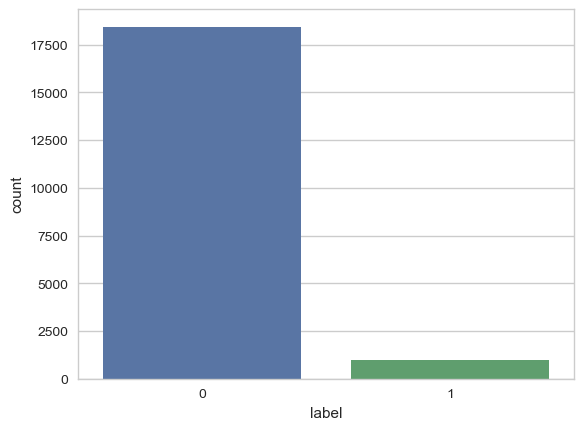

In [33]:
sns.countplot('label',data=dftrain)

### Separamos un set para testeo
Por ahora dejamos un 25% para el set de testeo.
- Ver cómo usar cross validation.

In [34]:
from sklearn.cross_validation import train_test_split

C:\Users\vfarfan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [35]:
X = dftrain.iloc[:,0:15]
y = dftrain.iloc[:,15]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [36]:
y.head()

person
0008ed71    0
000c79fe    0
001802e4    0
0019e639    0
001b0bf9    0
Name: label, dtype: int64

## Entrenamiento del modelo

In [37]:
# Librerías para métricas
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

## 0. Sin modelo
Vemos cómo dan las métricas si consideramos que nadie convierte.

In [110]:
y_pred = np.zeros(len(y_test))
cm = confusion_matrix(y_test, y_pred)

Recall: 0.0


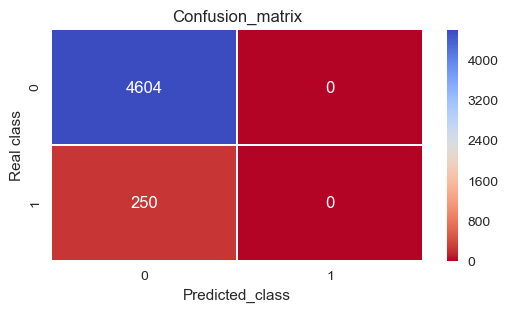

In [111]:
print("Recall:",cm[1,1]/(cm[1,1]+cm[1,0]))
fig= plt.figure(figsize=(6,3))# to plot the graph

sns.heatmap(cm,cmap="coolwarm_r",annot=True,linewidths=0.5, fmt='g')
plt.title("Confusion_matrix")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.show()


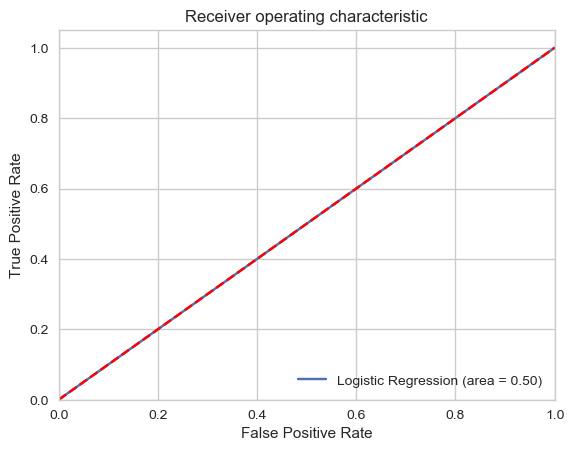

In [112]:
# Evaluamos el modelo
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [113]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 94.85%


### 1. Regresion logística

In [114]:
from sklearn.linear_model import LogisticRegression
# Entrenamos el modelo
classifier = LogisticRegression(random_state = 0, C=0.5)
classifier.fit(X_train, y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Predicción

In [115]:
y_pred = classifier.predict(X_test)
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Recall: 0.012


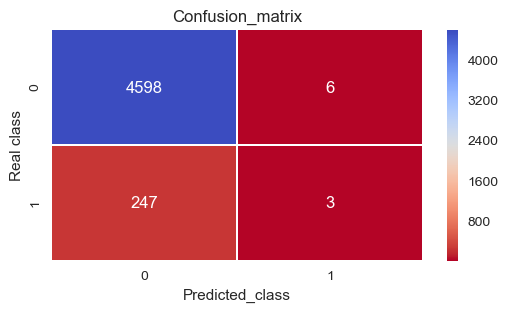

In [116]:
print("Recall:",cm[1,1]/(cm[1,1]+cm[1,0]))
fig= plt.figure(figsize=(6,3))# to plot the graph

sns.heatmap(cm,cmap="coolwarm_r",annot=True,linewidths=0.5, fmt='g')
plt.title("Confusion_matrix")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.show()

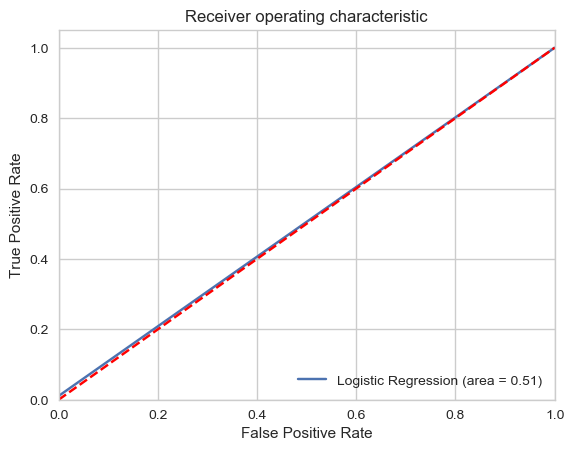

In [117]:
# Evaluamos el modelo
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [118]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 94.79%


## Random Forest


In [119]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, criterion="gini", max_depth=100, random_state= 0)
classifier.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [120]:
y_pred = classifier.predict(X_test)

In [121]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Recall: 0.012


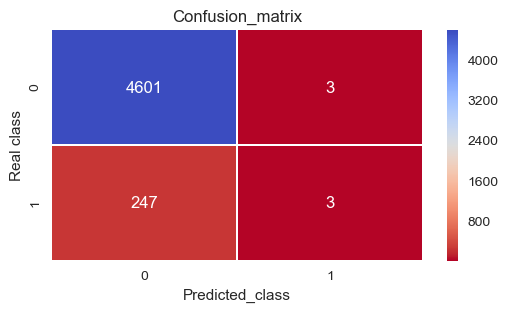

In [122]:
print("Recall:",cm[1,1]/(cm[1,1]+cm[1,0]))
fig= plt.figure(figsize=(6,3))# to plot the graph

sns.heatmap(cm,cmap="coolwarm_r",annot=True,linewidths=0.5, fmt='g')
plt.title("Confusion_matrix")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.show()

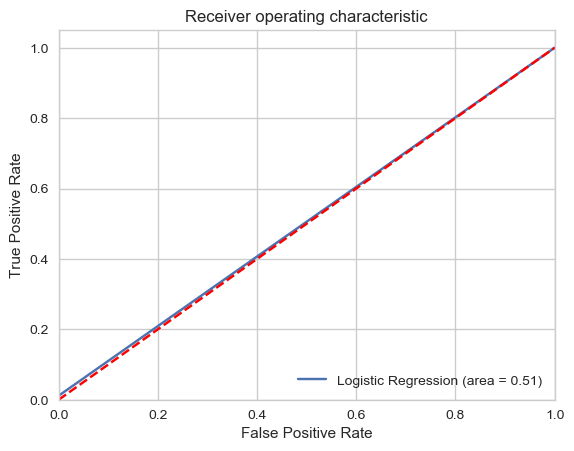

In [123]:
# Evaluamos el modelo
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [124]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 94.85%
